<a href="https://colab.research.google.com/github/Davjot/ML_python/blob/main/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering
---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html" target="_blank"> Click Here</a>** 

2. Documentation on Pycaret-Regression: **<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html" target="_blank"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data
- Setting up Environment
- Create Model
- Tune Model
- Plot Model
- Finalize Model
- Predict Model
- Save / Load Model
---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null #remove the dialogue box 
!pip install markupsafe==2.0.1
print ("Pycaret installed sucessfully!!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.10'

---
# **1. Regression: Basics**
---
### **1.1 Get the list of datasets available in pycaret (Total Datasets = 55)**




In [ ]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "boston" dataset (Step-I)**
---

In [ ]:
bostonDataSet = get_data("boston")    # SN is 46

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
### **1.3 Parameter setting for all models (Step-II)**
---

In [ ]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', silent=True)

# Other Parameters:
# train_size = 0.7
# data_split_shuffle = False

,Description,Value
0,session_id,5802
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.4 Run all models (Step-III)**
---

In [ ]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.4046,11.1773,3.2490,0.8822,0.1545,0.1257,0.092
et,Extra Trees Regressor,2.2840,11.8246,3.2694,0.8775,0.1425,0.1135,0.539
rf,Random Forest Regressor,2.4434,13.0486,3.4711,0.8652,0.1576,0.1247,0.509
lightgbm,Light Gradient Boosting Machine,2.4285,13.0568,3.5046,0.8650,0.1559,0.1229,0.067
ada,AdaBoost Regressor,3.0735,19.0580,4.2505,0.8008,0.2018,0.1666,0.090
dt,Decision Tree Regressor,3.3371,24.7848,4.8714,0.7416,0.2118,0.1670,0.015
lar,Least Angle Regression,3.5996,26.4123,5.0074,0.7228,0.2363,0.1852,0.015
lr,Linear Regression,3.5991,26.4996,5.0170,0.7221,0.2363,0.1851,0.305
ridge,Ridge Regression,3.5691,26.6196,5.0171,0.7218,0.2381,0.1844,0.012
br,Bayesian Ridge,3.5751,27.0489,5.0469,0.7188,0.2394,0.1847,0.012


---
### **1.5 "Three line of code" for model comparison for "Boston" dataset**
---



In [ ]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")
setup(data = bostonDataSet, target='medv', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2887,10.6459,3.2077,0.8568,0.1477,0.1168,0.094
et,Extra Trees Regressor,2.2091,11.3908,3.2762,0.8545,0.1439,0.1126,0.444
rf,Random Forest Regressor,2.3540,11.8335,3.3465,0.8463,0.1521,0.1211,0.510
lightgbm,Light Gradient Boosting Machine,2.4614,13.5234,3.5368,0.8294,0.1547,0.1225,0.038
ada,AdaBoost Regressor,3.0002,16.9548,4.0242,0.7766,0.1919,0.1640,0.093
dt,Decision Tree Regressor,2.9703,17.8744,4.1813,0.7673,0.2001,0.1569,0.018
lr,Linear Regression,3.4560,24.9523,4.8577,0.6907,0.2329,0.1776,0.012
lar,Least Angle Regression,3.4560,24.9523,4.8577,0.6907,0.2329,0.1776,0.016
ridge,Ridge Regression,3.4157,25.0157,4.8588,0.6900,0.2373,0.1761,0.012
br,Bayesian Ridge,3.4151,25.6217,4.9149,0.6818,0.2422,0.1754,0.013


---
### **1.6 "Three line of code" for model comparison for "Insurance" dataset**
---



In [ ]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2567.1638,2.095511e+07,4537.1000,0.8385,0.4357,0.3091,0.087
lightgbm,Light Gradient Boosting Machine,2827.7511,2.282086e+07,4746.0359,0.8234,0.5255,0.3573,0.049
rf,Random Forest Regressor,2692.3073,2.306281e+07,4775.5326,0.8213,0.4726,0.3383,0.549
et,Extra Trees Regressor,2664.1936,2.607449e+07,5089.4898,0.7987,0.4756,0.3113,0.542
ada,AdaBoost Regressor,4377.5226,2.828103e+07,5293.0899,0.7814,0.6512,0.7749,0.035
llar,Lasso Least Angle Regression,4146.8919,3.537458e+07,5905.8770,0.7307,0.5632,0.4305,0.015
ridge,Ridge Regression,4162.0191,3.537842e+07,5906.7560,0.7306,0.5736,0.4330,0.012
br,Bayesian Ridge,4159.6563,3.538185e+07,5906.9184,0.7306,0.5757,0.4325,0.013
lasso,Lasso Regression,4152.3339,3.538614e+07,5906.8646,0.7305,0.5836,0.4310,0.013
lr,Linear Regression,4152.2432,3.538683e+07,5906.8977,0.7304,0.5902,0.4310,0.013


---
# **2. Regression: working with user dataset**
---
### **2.1 Download the "boston" dataset to local system** 
---

In [ ]:
bostonDataSet.to_csv("bostonDataSet.csv", index=False)

from google.colab import files
files.download('bostonDataSet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **2.2 Uploading "user file" from user system**

In [ ]:
from google.colab import files
files.upload()

---
### **2.3 "Read" the uploaded file**
---

In [ ]:
import pandas as pd
myDataSet = pd.read_csv('bostonDataSet (1).csv')
myDataSet.head()

---
### **2.4 "Compare" the model performance**
---

In [ ]:
from pycaret.regression import *
setup(data = myDataSet, target='medv', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1484,9.8255,2.9977,0.8704,0.1400,0.1122,0.092
et,Extra Trees Regressor,2.2363,12.2422,3.3423,0.8465,0.1443,0.1109,0.441
rf,Random Forest Regressor,2.2918,12.4790,3.3461,0.8415,0.1507,0.1171,0.497
lightgbm,Light Gradient Boosting Machine,2.3469,13.8349,3.5601,0.8260,0.1574,0.1187,0.036
ada,AdaBoost Regressor,2.8375,16.8532,3.9010,0.7857,0.1842,0.1518,0.092
dt,Decision Tree Regressor,3.0314,20.4211,4.3908,0.7206,0.1926,0.1514,0.014
lr,Linear Regression,3.2820,22.4959,4.5906,0.7107,0.2466,0.1646,0.012
ridge,Ridge Regression,3.2715,22.7424,4.6034,0.7092,0.2572,0.1648,0.012
br,Bayesian Ridge,3.3197,23.5006,4.6735,0.7004,0.2548,0.1677,0.013
en,Elastic Net,3.6903,28.9876,5.2467,0.6216,0.2600,0.1789,0.013


---
### **2.5 "Three line of code" for model comparison for "user dataset**
##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine
---

In [ ]:
from pycaret.regression import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")
#s = setup(data = myDataSet, target='cancer'), silent=True)
#cm = compare_models()

---
# **3. Regression: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1103,10.8413,3.1397,0.8699,0.1372,0.1047,0.449
lightgbm,Light Gradient Boosting Machine,2.3838,13.4614,3.5553,0.8347,0.1559,0.1177,0.039
rf,Random Forest Regressor,2.3369,13.6988,3.5639,0.8289,0.1539,0.1175,0.512
gbr,Gradient Boosting Regressor,2.3973,13.9839,3.5885,0.8272,0.1611,0.1219,0.095
ada,AdaBoost Regressor,2.7812,15.8669,3.8271,0.8099,0.1781,0.1473,0.092
knn,K Neighbors Regressor,2.8314,17.2390,3.9870,0.7942,0.1686,0.1350,0.060
br,Bayesian Ridge,3.2203,21.1381,4.5061,0.7461,0.2387,0.1576,0.013
ridge,Ridge Regression,3.2654,21.2301,4.5235,0.7441,0.2382,0.1597,0.013
lr,Linear Regression,3.2851,21.3330,4.5373,0.7426,0.2386,0.1607,0.020
huber,Huber Regressor,3.1064,22.4638,4.6184,0.7316,0.2574,0.1485,0.028


---
### **3.2 Model performance using "Feature Selection"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      feature_selection = True, feature_selection_method = 'classic',
      feature_selection_threshold = 0.2,  silent=True)
cm = compare_models()

#feature_selection_method = {classic, boruta}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1279,9.2280,2.9758,0.8873,0.1334,0.1067,0.407
gbr,Gradient Boosting Regressor,2.1761,10.0837,3.1067,0.8709,0.1405,0.1104,0.075
rf,Random Forest Regressor,2.2507,11.1237,3.2638,0.8611,0.1433,0.1120,0.474
lightgbm,Light Gradient Boosting Machine,2.3960,13.2973,3.5399,0.8399,0.1568,0.1201,0.033
ada,AdaBoost Regressor,2.8914,16.6914,3.9545,0.7939,0.1819,0.1520,0.085
dt,Decision Tree Regressor,2.9884,23.3881,4.6771,0.7072,0.1994,0.1461,0.015
lr,Linear Regression,3.6781,27.7681,5.2244,0.6630,0.2554,0.1861,0.012
lar,Least Angle Regression,3.7153,27.8564,5.2312,0.6624,0.2573,0.1887,0.013
ridge,Ridge Regression,3.6587,27.9535,5.2396,0.6606,0.2571,0.1857,0.012
br,Bayesian Ridge,3.6988,28.6629,5.3061,0.6526,0.2597,0.1870,0.012


---
### **3.3 Model performance using "Outlier Removal"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1521,1.125390e+01,3.2404,8.419000e-01,0.1390,0.1066,0.437
gbr,Gradient Boosting Regressor,2.2362,1.203070e+01,3.3820,8.245000e-01,0.1463,0.1121,0.090
lightgbm,Light Gradient Boosting Machine,2.3899,1.328070e+01,3.5316,8.092000e-01,0.1509,0.1178,0.035
rf,Random Forest Regressor,2.3747,1.435580e+01,3.6619,7.914000e-01,0.1552,0.1182,0.501
ada,AdaBoost Regressor,2.8459,1.735130e+01,4.0480,7.542000e-01,0.1830,0.1497,0.093
lr,Linear Regression,3.3940,2.345770e+01,4.7503,6.825000e-01,0.2303,0.1671,0.027
ridge,Ridge Regression,3.3631,2.374270e+01,4.7739,6.799000e-01,0.2370,0.1661,0.031
br,Bayesian Ridge,3.4007,2.466560e+01,4.8726,6.700000e-01,0.2505,0.1690,0.025
dt,Decision Tree Regressor,3.2422,2.438790e+01,4.8072,6.294000e-01,0.2048,0.1642,0.015
en,Elastic Net,3.6929,2.868540e+01,5.2673,6.186000e-01,0.2566,0.1781,0.030


---
### **3.4 Model performance using "Transformation"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1143,10.1253,3.0639,0.8748,0.1341,0.1057,0.452
gbr,Gradient Boosting Regressor,2.2618,11.5276,3.2864,0.8543,0.1445,0.1141,0.090
lightgbm,Light Gradient Boosting Machine,2.3154,12.6017,3.4216,0.8439,0.1513,0.1150,0.038
rf,Random Forest Regressor,2.3591,12.9926,3.5089,0.8390,0.1481,0.1165,0.509
ada,AdaBoost Regressor,2.8868,16.5900,3.9525,0.7929,0.1795,0.1505,0.091
knn,K Neighbors Regressor,2.8833,18.9909,4.2014,0.7728,0.1720,0.1379,0.062
dt,Decision Tree Regressor,2.9883,19.8997,4.4009,0.7535,0.1906,0.1479,0.015
br,Bayesian Ridge,3.3018,21.1434,4.5405,0.7359,0.2102,0.1642,0.015
ridge,Ridge Regression,3.3474,21.2882,4.5591,0.7333,0.2118,0.1661,0.026
lr,Linear Regression,3.3659,21.3896,4.5712,0.7317,0.2125,0.1669,0.021


---
### **3.5 Model performance using "PCA"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.0108,36.0516,5.8691,0.5197,0.2488,0.2031,0.444
et,Extra Trees Regressor,4.0347,36.4428,5.8474,0.5186,0.2509,0.2044,0.404
gbr,Gradient Boosting Regressor,4.1942,38.6894,6.0971,0.4876,0.2587,0.2122,0.056
lightgbm,Light Gradient Boosting Machine,4.3441,39.3173,6.1397,0.4805,0.2609,0.2192,0.033
knn,K Neighbors Regressor,4.5834,42.6438,6.4343,0.4243,0.2698,0.2296,0.060
ridge,Ridge Regression,4.8766,49.2192,6.8763,0.3603,0.2835,0.2417,0.040
en,Elastic Net,4.8777,49.2190,6.8765,0.3603,0.2835,0.2418,0.029
lar,Least Angle Regression,4.8766,49.2192,6.8763,0.3603,0.2835,0.2417,0.012
lasso,Lasso Regression,4.8785,49.2198,6.8768,0.3603,0.2835,0.2419,0.023
lr,Linear Regression,4.8766,49.2192,6.8763,0.3603,0.2835,0.2417,0.019


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv', 
      remove_outliers = True, outliers_threshold = 0.05,
      normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1267,10.1527,3.1041,0.8807,0.1365,0.1046,0.450
gbr,Gradient Boosting Regressor,2.2723,10.7365,3.1973,0.8695,0.1488,0.1146,0.091
rf,Random Forest Regressor,2.2837,11.6284,3.2911,0.8615,0.1482,0.1141,0.516
lightgbm,Light Gradient Boosting Machine,2.3401,11.9910,3.3162,0.8606,0.1482,0.1153,0.036
ada,AdaBoost Regressor,2.9253,16.4002,3.9604,0.8007,0.1869,0.1559,0.091
knn,K Neighbors Regressor,2.9041,18.3009,4.1802,0.7892,0.1713,0.1334,0.061
dt,Decision Tree Regressor,3.2940,21.8862,4.5680,0.7357,0.1946,0.1568,0.014
ridge,Ridge Regression,3.5112,24.7373,4.9046,0.6976,0.2709,0.1684,0.013
lr,Linear Regression,3.5382,24.8351,4.9148,0.6964,0.2693,0.1694,0.021
br,Bayesian Ridge,3.4791,24.8342,4.9129,0.6961,0.2714,0.1677,0.014


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [ ]:
setup(data = bostonDataSet, target = 'medv',
      remove_outliers = True, outliers_threshold = 0.05, 
      normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1272,8.7308,2.9080,0.8774,0.1440,0.1110,0.090
rf,Random Forest Regressor,2.2544,10.6485,3.1808,0.8527,0.1471,0.1158,0.499
ada,AdaBoost Regressor,2.7789,12.5993,3.5115,0.8209,0.1704,0.1489,0.088
lightgbm,Light Gradient Boosting Machine,2.3865,12.4014,3.4403,0.8179,0.1525,0.1180,0.036
et,Extra Trees Regressor,2.2537,12.3703,3.3794,0.8169,0.1482,0.1132,0.444
knn,K Neighbors Regressor,2.9633,20.4142,4.3405,0.7409,0.1805,0.1386,0.062
dt,Decision Tree Regressor,2.9468,17.5065,4.1087,0.7189,0.1899,0.1502,0.015
ridge,Ridge Regression,3.5663,24.1647,4.8377,0.6762,0.2435,0.1838,0.012
lar,Least Angle Regression,3.6393,24.2384,4.8447,0.6755,0.2449,0.1870,0.017
lr,Linear Regression,3.6051,24.2638,4.8474,0.6752,0.2455,0.1856,0.013


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.3**
- **<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html" target="_blank"> Click Here</a>** for more

---
# **4. Regression: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [3]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7223,22.2259,4.7144,0.7994,0.1610,0.1182
1,1.8042,7.1579,2.6754,0.8317,0.1341,0.1008
2,2.4369,13.5924,3.6868,0.7258,0.1835,0.1370
3,2.7821,15.6148,3.9516,0.8382,0.1577,0.1311
4,2.1388,10.3217,3.2127,0.8776,0.1707,0.1374
5,3.1745,21.2266,4.6072,0.7720,0.1982,0.1462
6,1.7878,6.1276,2.4754,0.9285,0.1308,0.0947
7,2.0358,6.4519,2.5401,0.9255,0.1233,0.1060
8,2.8242,18.3603,4.2849,0.8100,0.1411,0.1144


---
### **4.2 Other available regression models**
---
-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.create_model" target="_blank"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [4]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on "new unseen dataset"**

In [5]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.4013,2.7189,1.6489,0.9345,0.0632,0.0538


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.379000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.033000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,36.148001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,35.198001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.636001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,27.169001
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,20.196000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,24.091000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.279000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,19.268000


---
### **4.5 "Scatter plot" b/w actual and predicted** 
---

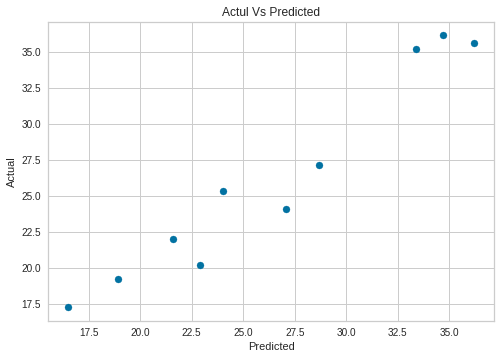

In [6]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **4.6 Download the "Scatter plot"** 
---

In [9]:
from google.colab import files
files.download('result-scatter-plot.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **4.7 "Save" and "Download" the prediction result** 
---

In [7]:
from google.colab import files

newPredictions.to_csv("NewPredictions.csv", index=False)
files.download('NewPredictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **4.8 "Save" the trained model** 
---

In [ ]:
sm = save_model(rfModel, 'rfModelFile')

---
### **4.9 Download the "trained model file" to user local system** 
---

In [12]:
from google.colab import files
files.download('rfModelFile.pkl')

FileNotFoundError: ignored

---
### **4.10  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
### **4.10.1 Upload the  "Trained Model"**


In [13]:
from google.colab import files
files.upload()

MessageError: ignored

---
### **4.10.2 Load the "Model"**
---

In [ ]:
rfModel = load_model('rfModelFile (1)')

Transformation Pipeline and Model Successfully Loaded


---
### **4.10.3 Make the prediction on "new unseen dataset"**
---

In [ ]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,26.562000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.290000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.718001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.719001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.655001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.934000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,20.528000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,23.994000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.770000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,19.118000


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**

- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [14]:
rfModel = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7223,22.2259,4.7144,0.7994,0.1610,0.1182
1,1.8042,7.1579,2.6754,0.8317,0.1341,0.1008
2,2.4369,13.5924,3.6868,0.7258,0.1835,0.1370
3,2.7821,15.6148,3.9516,0.8382,0.1577,0.1311
4,2.1388,10.3217,3.2127,0.8776,0.1707,0.1374
5,3.1745,21.2266,4.6072,0.7720,0.1982,0.1462
6,1.7878,6.1276,2.4754,0.9285,0.1308,0.0947
7,2.0358,6.4519,2.5401,0.9255,0.1233,0.1060
8,2.8242,18.3603,4.2849,0.8100,0.1411,0.1144


---
### **5.2 Plot the "error"**
---

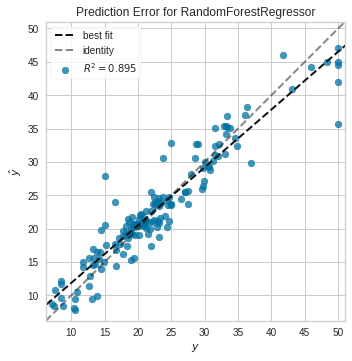

In [15]:
plot_model(rfModel, plot='error')

---
### **5.3 Plot the "learning curve"**
---

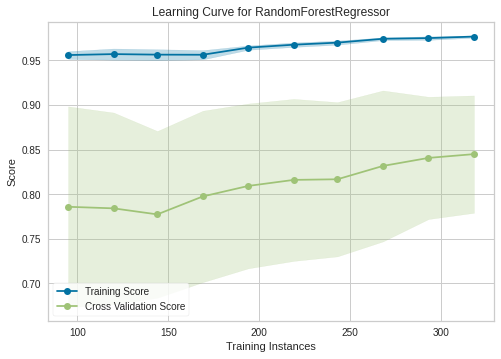

In [16]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "validation curve"**
---

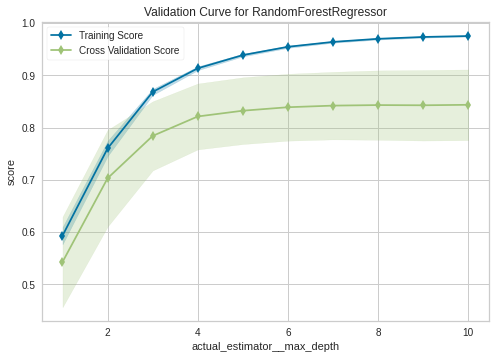

In [17]:
plot_model(rfModel, plot='vc')

---
### **5.5 Get the model "parameters"**
---

In [18]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


---
### **5.6 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.plot_model" target="_blank"> Click Here </a>**

---
# **6. Feature Importance**
---
### **6.1 Feature Importance using "Random Forest"**


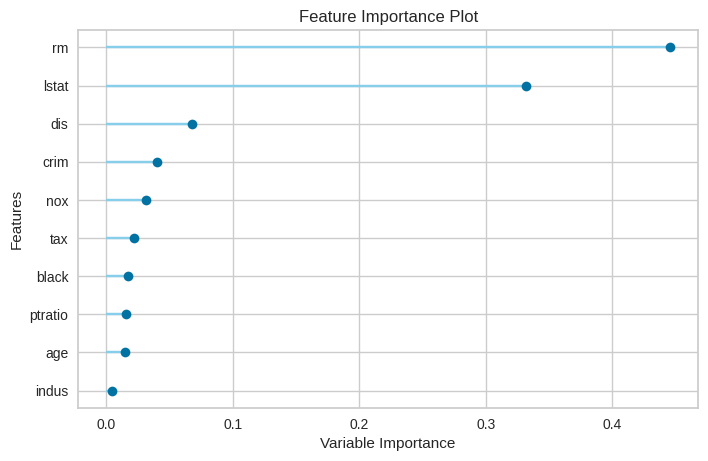

In [19]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

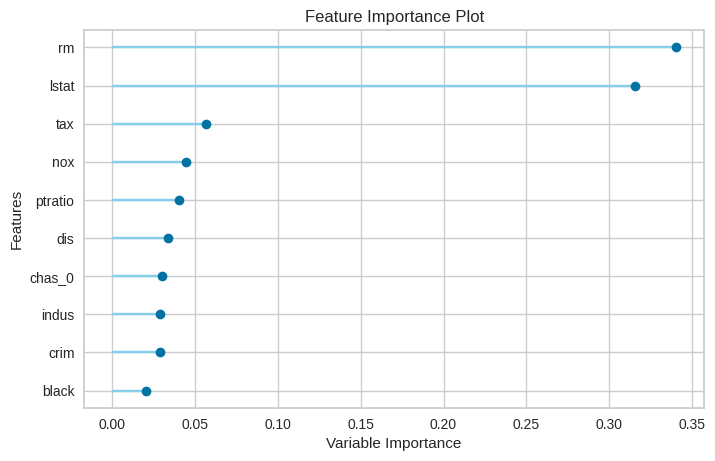

In [20]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

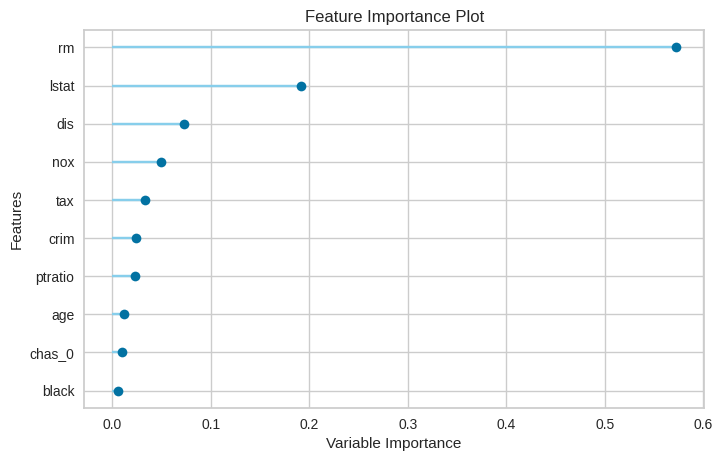

In [21]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [22]:
dtModel = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0306,10.9392,3.3074,0.9013,0.1573,0.1069
1,2.7667,17.8156,4.2208,0.5812,0.1819,0.1398
2,3.9611,52.7722,7.2644,-0.0645,0.2927,0.2294
3,4.3083,48.5603,6.9685,0.4969,0.2945,0.1958
4,3.4600,41.0289,6.4054,0.5133,0.2423,0.1970
5,2.9914,19.7929,4.4489,0.7874,0.1870,0.1360
6,3.3971,54.1483,7.3586,0.3679,0.2902,0.2228
7,3.2200,25.7883,5.0782,0.7024,0.2275,0.1528
8,4.1514,50.8374,7.1300,0.4738,0.2129,0.1557


#### **Get the "parameters" of Decision Tree**

In [23]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


---
### **7.2 Tune "Decision Tree" model**
---

In [24]:
dtModelTuned = tune_model(dtModel, n_iter=200)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3431,34.7653,5.8962,0.6862,0.1933,0.1427
1,1.8875,5.2362,2.2883,0.8769,0.1123,0.0965
2,3.6444,23.0429,4.8003,0.5352,0.2479,0.2032
3,3.5833,29.4001,5.4222,0.6954,0.2098,0.1563
4,3.2671,24.8999,4.9900,0.7046,0.2408,0.2021
5,3.9457,49.7010,7.0499,0.4662,0.2770,0.1745
6,2.2629,9.1344,3.0223,0.8934,0.1344,0.1087
7,3.0786,14.0875,3.7533,0.8374,0.1784,0.1576
8,2.8857,16.3570,4.0444,0.8307,0.1801,0.1299


#### **Get the "tuned parameters" of Decision Tree**

In [25]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mae
max_depth,8
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,2
min_samples_split,10
min_weight_fraction_leaf,0.0


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.tune_model" target="_blank"> Click Here </a>**

---
# **8. AutoML - Advanced Machine Learning**
---

- Select n Best Models:
  - Ensemble, Stacking, Begging, Blending
  - Auto tune the best n models

**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.automl" target="_blank">Click Here</a>**


---
# **9. Deploy the model on AWS / Azure**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.deploy_model" target="_blank">Click Here</a>**
